In [16]:
import pandas as pd

df = pd.read_csv("age_pop.csv.gz")

/var/folders/yb/tqmjwv9x21ndz4w9s23x812c0000gn/T/ipykernel_11808/3602831735.py:3: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("age_pop.csv.gz")


In [18]:
df.head(2)

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950,0,0,1,1255.174,1217.287,2472.461
1,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,2,Medium,1950,1950,1,1,1,1079.222,1055.572,2134.794


In [19]:
df.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'AgeGrp', 'AgeGrpStart', 'AgeGrpSpan', 'PopMale',
       'PopFemale', 'PopTotal'],
      dtype='object')

In [20]:
us_data = df["ISO2_code"].values
us_data

array([nan, nan, nan, ..., 'WF', 'WF', 'WF'], dtype=object)

In [21]:
test = df[df["ISO2_code"]=="WF"]["Location"]
test

4140596    Wallis and Futuna Islands
4140597    Wallis and Futuna Islands
4140598    Wallis and Futuna Islands
4140599    Wallis and Futuna Islands
4140600    Wallis and Futuna Islands
                     ...            
4148065    Wallis and Futuna Islands
4148066    Wallis and Futuna Islands
4148067    Wallis and Futuna Islands
4148068    Wallis and Futuna Islands
4148069    Wallis and Futuna Islands
Name: Location, Length: 7474, dtype: object

In [22]:
df.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'AgeGrp', 'AgeGrpStart', 'AgeGrpSpan', 'PopMale',
       'PopFemale', 'PopTotal'],
      dtype='object')

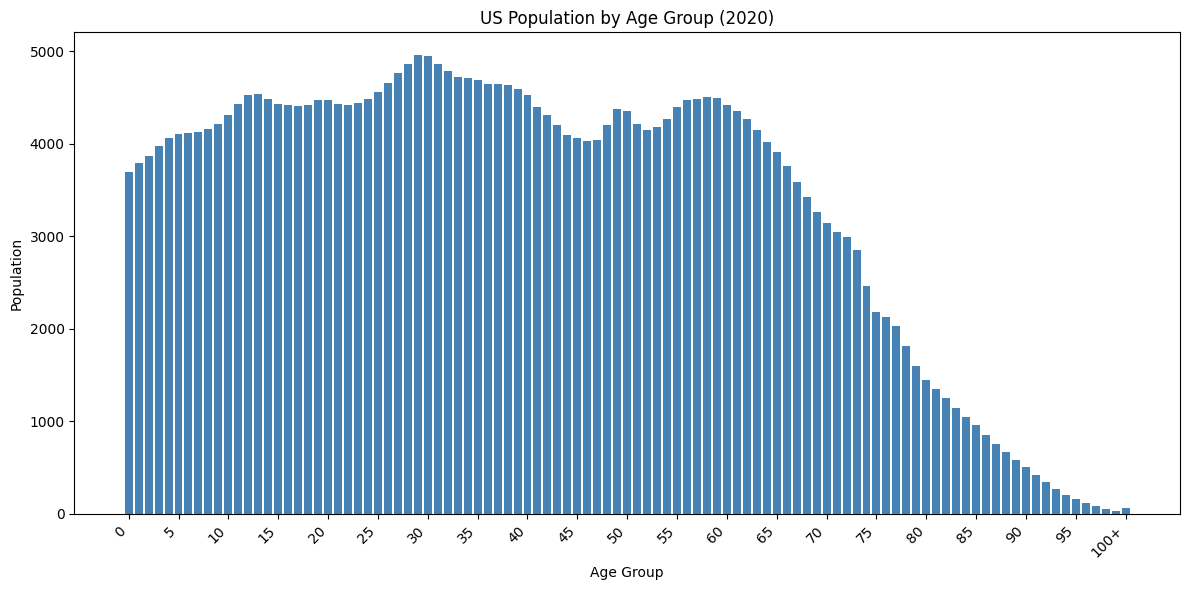

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

countries = [
    {"name": "India", "code": "IN"},
    {"name": "China", "code": "CN"},
    {"name": "United States", "code": "US"},
    {"name": "Indonesia", "code": "ID"},
    {"name": "Pakistan", "code": "PK"},
    {"name": "Nigeria", "code": "NG"},
    {"name": "Brazil", "code": "BR"},
    {"name": "Bangladesh", "code": "BD"},
    {"name": "Russia", "code": "RU"},
    {"name": "Ethiopia", "code": "ET"},
    {"name": "Mexico", "code": "MX"},
    {"name": "Japan", "code": "JP"}
]

# Filter for US, pick 2020
df_us = df[(df["ISO2_code"] == "US") & (df["Time"] == 2020)]

# Extract data
age_groups = df_us["AgeGrp"]
population = df_us["PopTotal"]

# Plot
plt.figure(figsize=(12,6))
plt.bar(age_groups, population, color="steelblue")

plt.ylabel("Population")
plt.xlabel("Age Group")
plt.title("US Population by Age Group (2020)")

# Show every 5th age group label
ticks_to_use = range(0, len(age_groups), 5)
plt.xticks(
    ticks_to_use, 
    [age_groups.iloc[i] for i in ticks_to_use], 
    rotation=45, 
    ha="right"
)

plt.tight_layout()
plt.show()

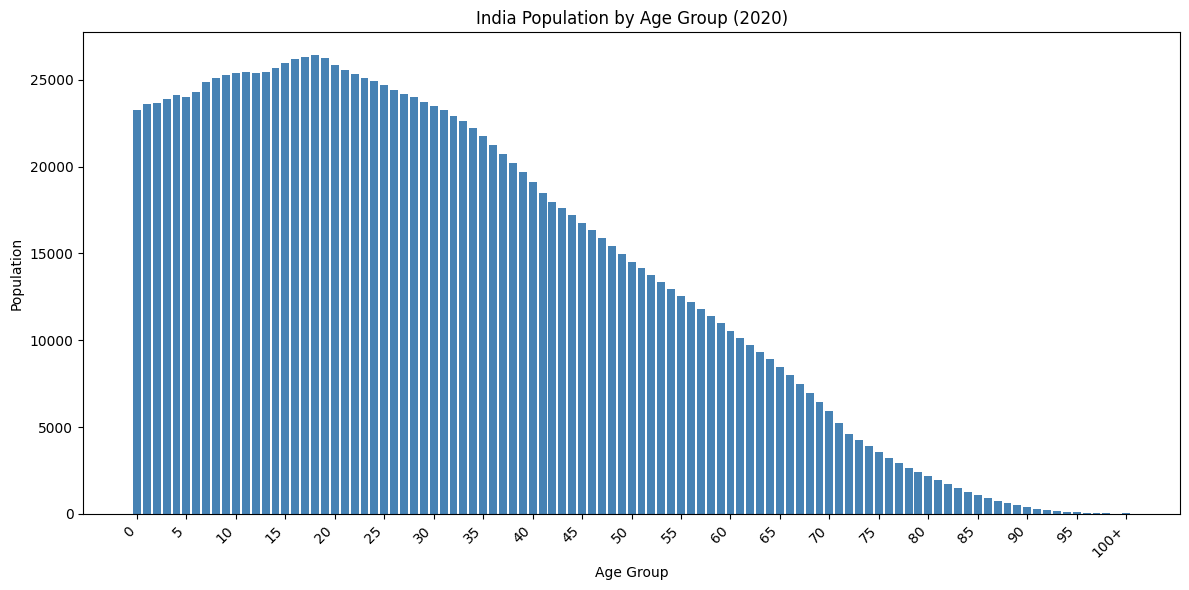

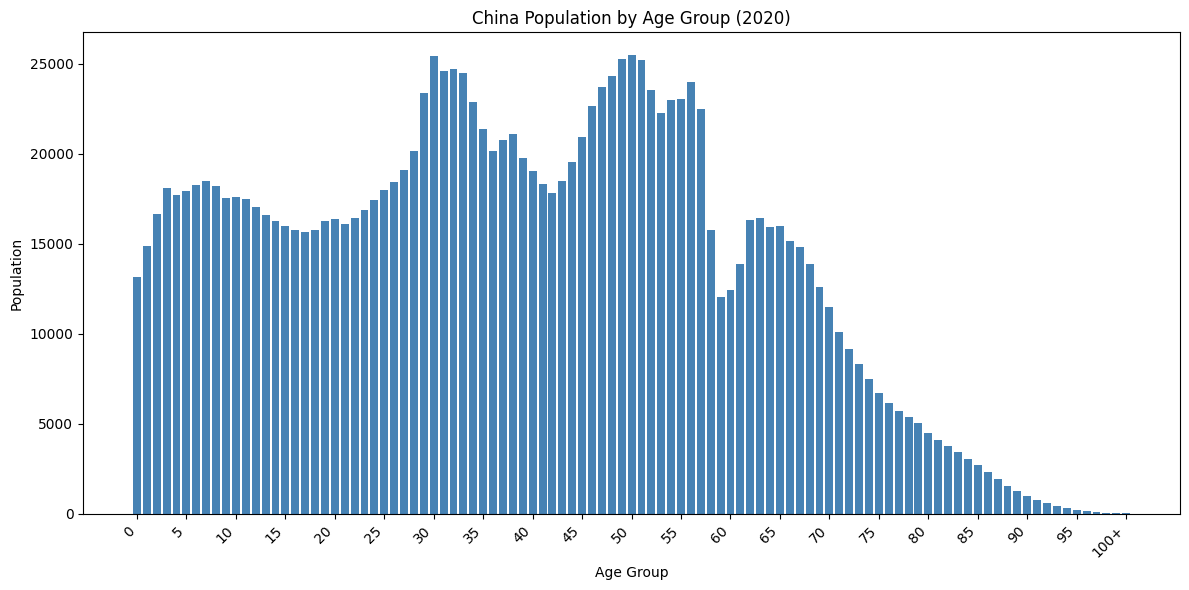

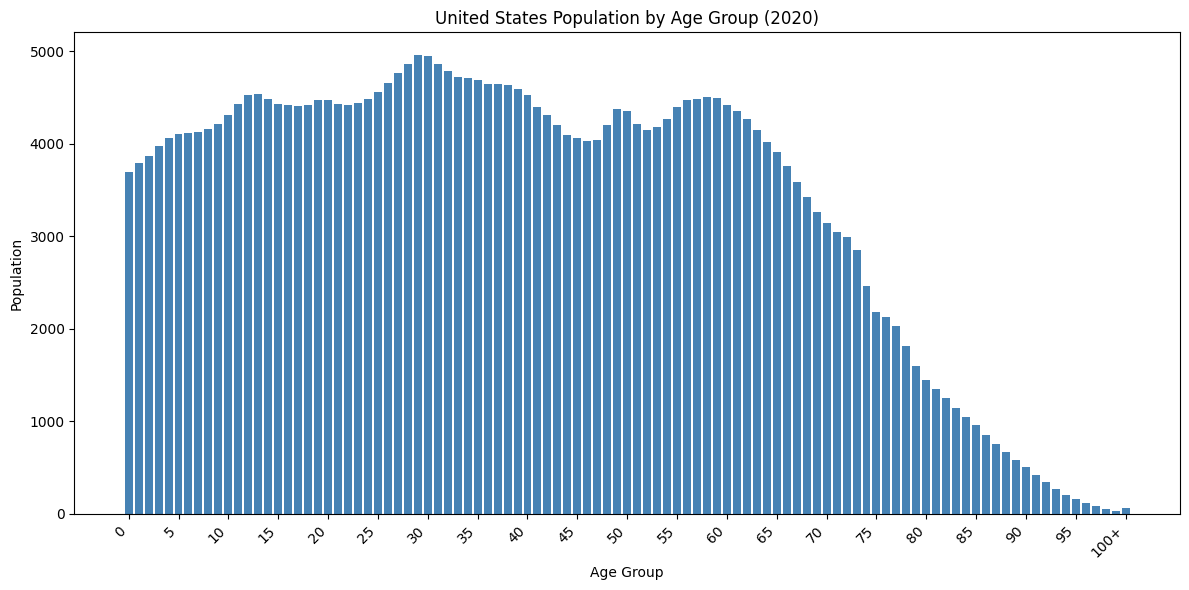

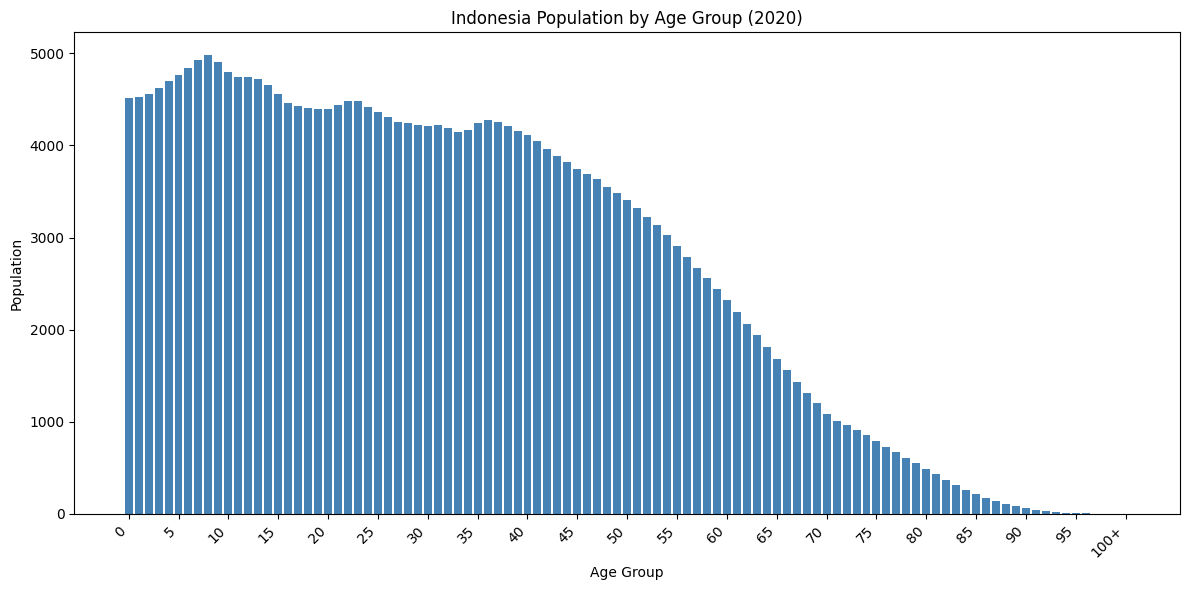

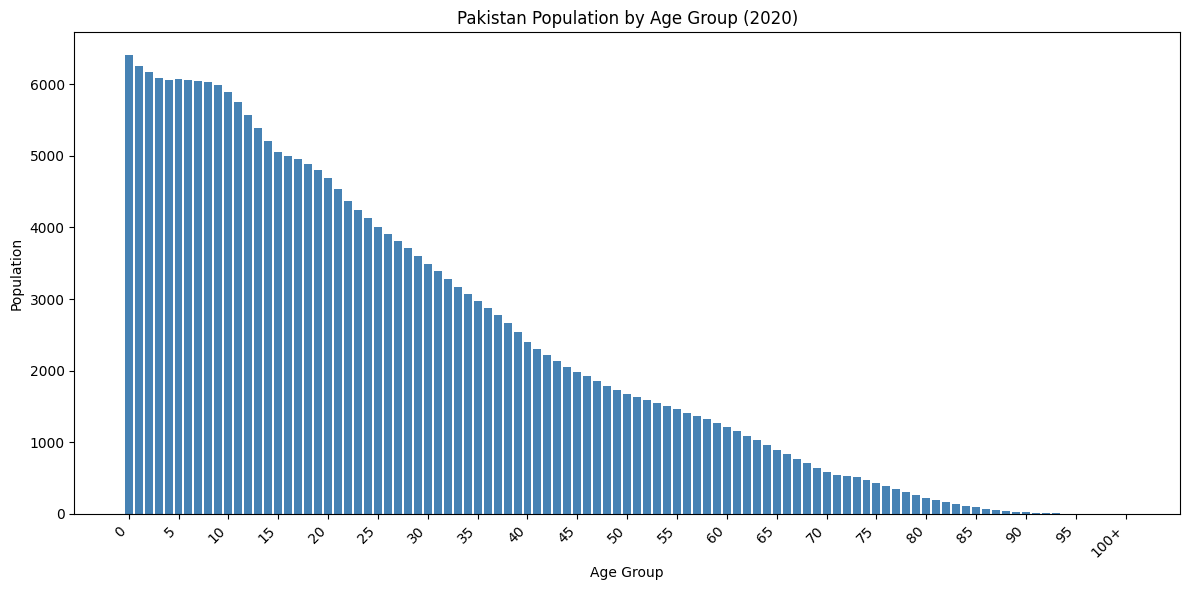

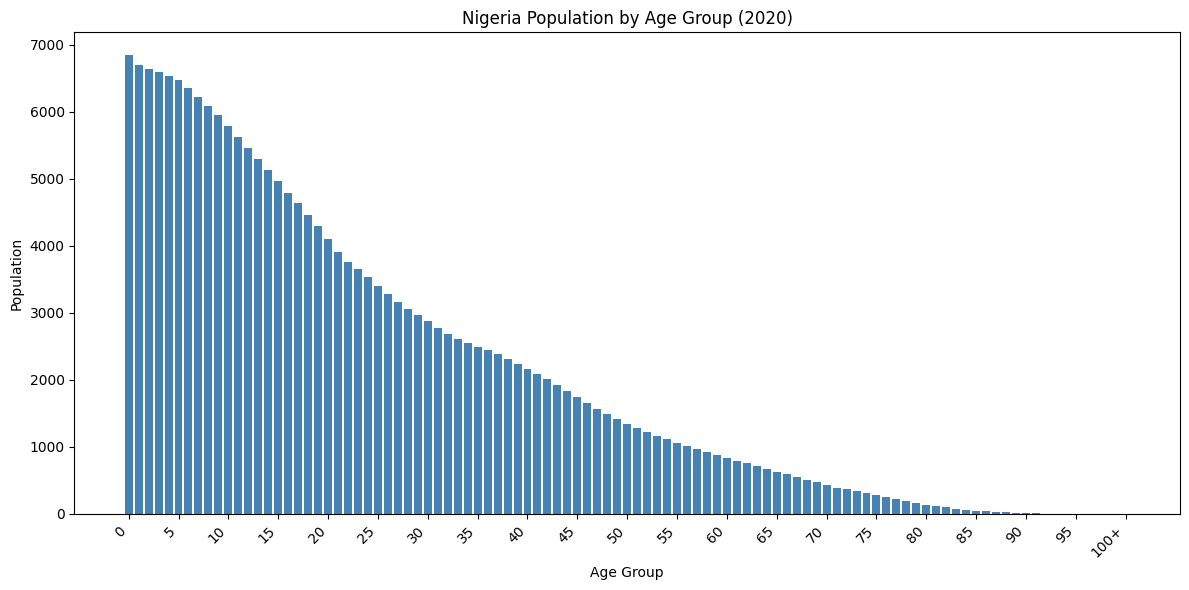

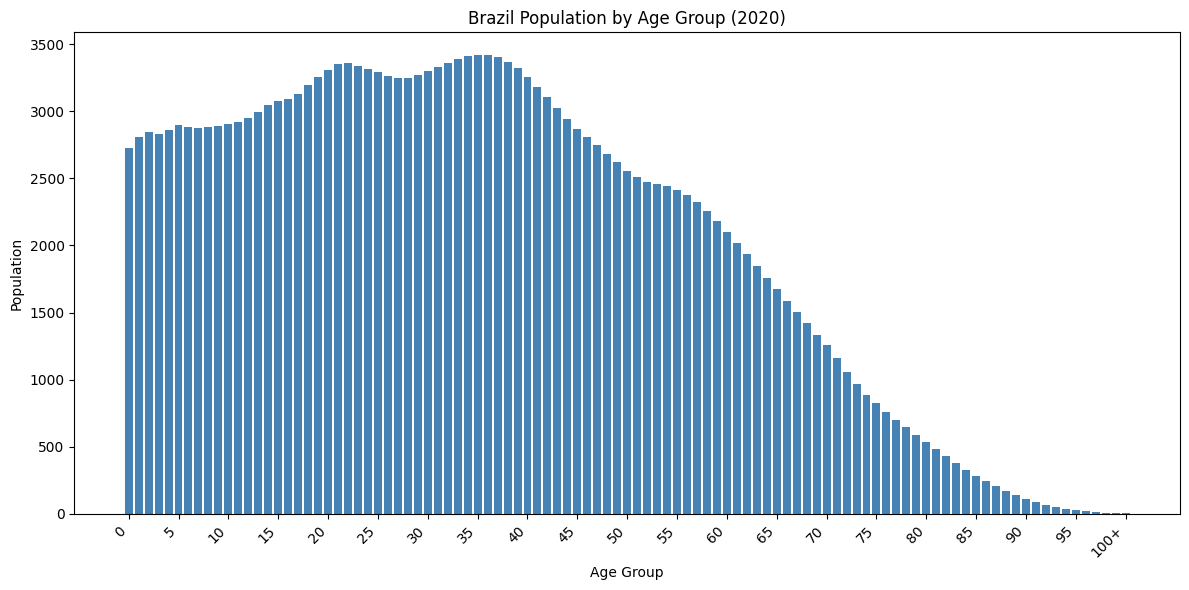

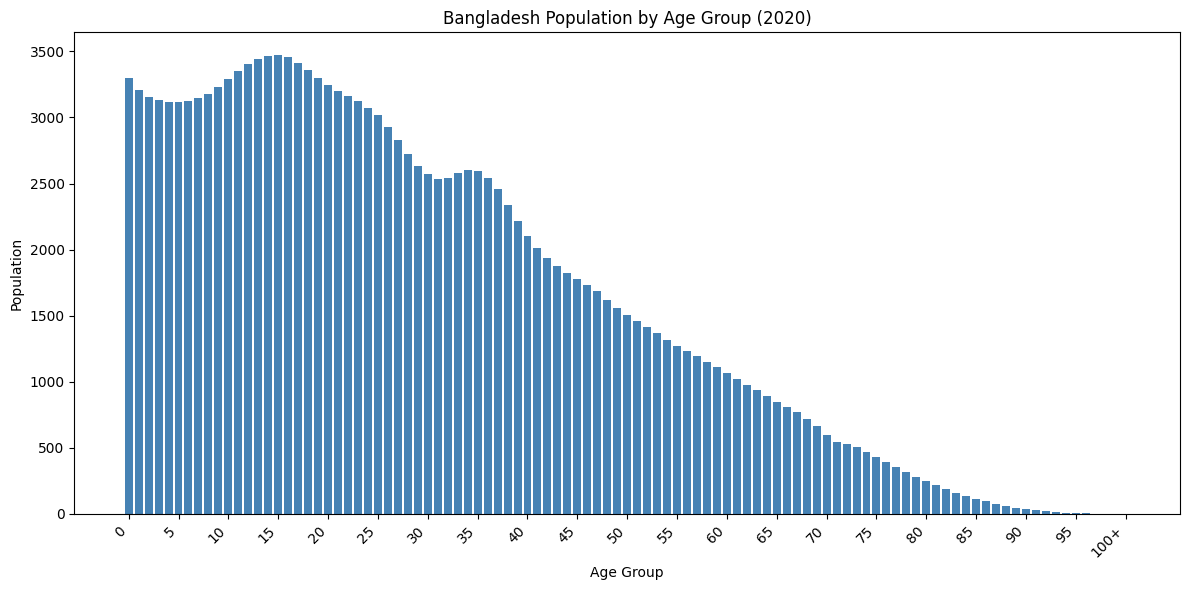

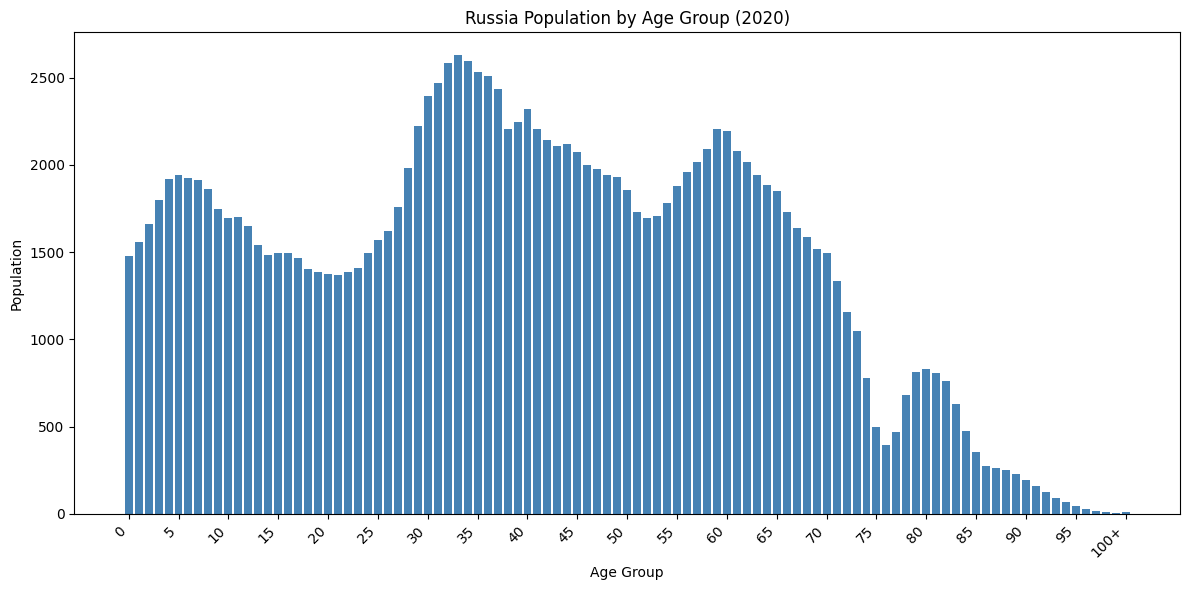

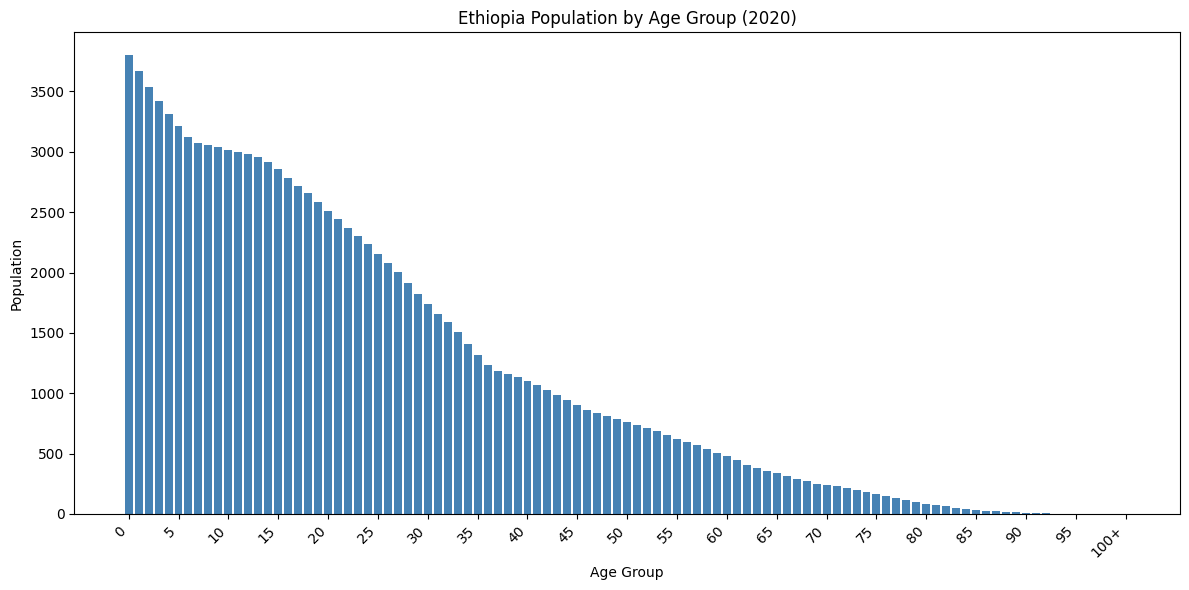

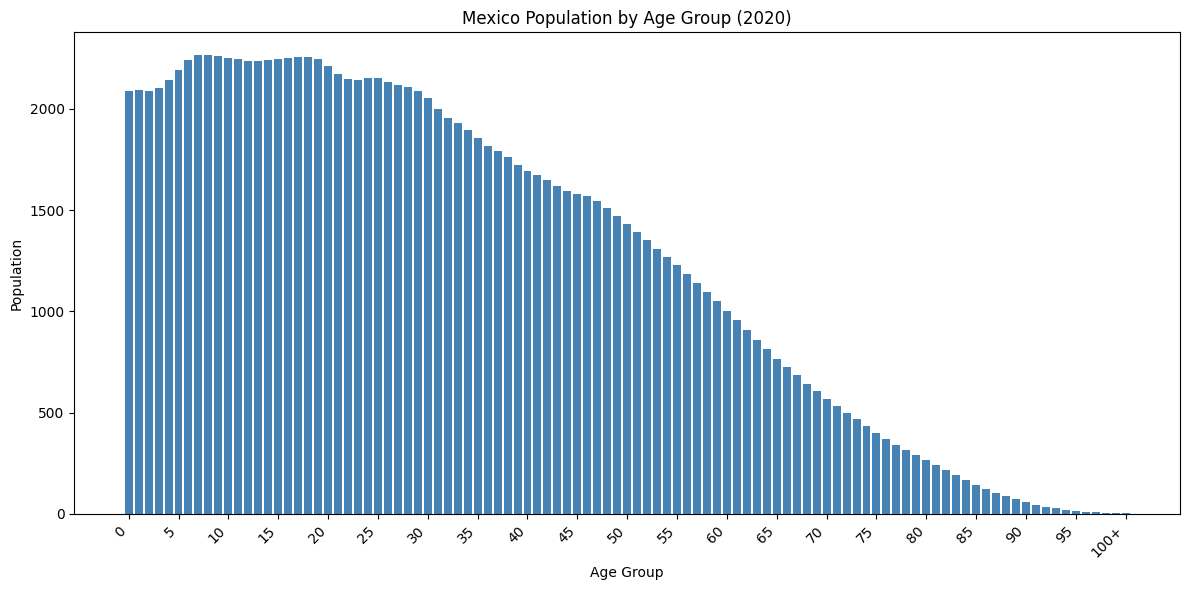

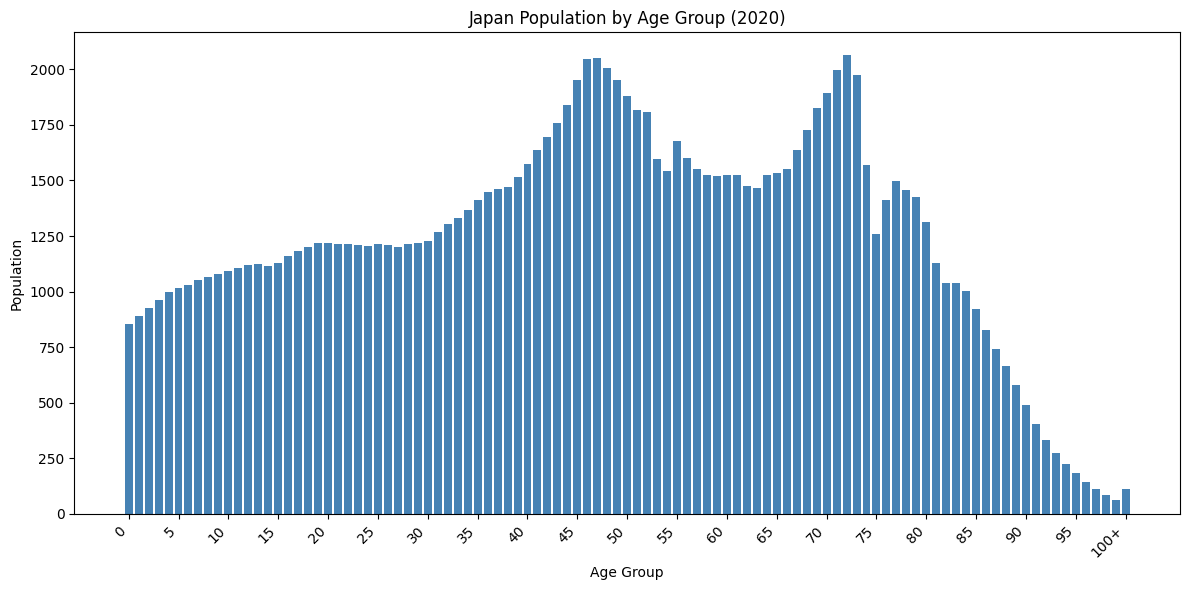

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# List of countries
countries = [
    {"name": "India", "code": "IN"},
    {"name": "China", "code": "CN"},
    {"name": "United States", "code": "US"},
    {"name": "Indonesia", "code": "ID"},
    {"name": "Pakistan", "code": "PK"},
    {"name": "Nigeria", "code": "NG"},
    {"name": "Brazil", "code": "BR"},
    {"name": "Bangladesh", "code": "BD"},
    {"name": "Russia", "code": "RU"},
    {"name": "Ethiopia", "code": "ET"},
    {"name": "Mexico", "code": "MX"},
    {"name": "Japan", "code": "JP"}
]

# Pick a single year
year = 2020

# Loop through countries
for country in countries:
    df_country = df[(df["ISO2_code"] == country["code"]) & (df["Time"] == year)].reset_index(drop=True)
    age_groups = df_country["AgeGrp"]
    population = df_country["PopTotal"]

    # Plot
    plt.figure(figsize=(12,6))
    plt.bar(age_groups, population, color="steelblue")
    plt.ylabel("Population")
    plt.xlabel("Age Group")
    plt.title(f"{country['name']} Population by Age Group ({year})")

    # Show every 5th age label
    ticks_to_use = range(0, len(age_groups), 5)
    plt.xticks(ticks_to_use, [age_groups.iloc[i] for i in ticks_to_use], rotation=45, ha="right")
    
    plt.tight_layout()
    
    # Save figure (optional)
    plt.savefig(f"{country['code']}_population_{year}.png")
    
    # Or just display
    plt.show()

#Population section 2, population growth

In [8]:
import pandas as pd
df = pd.read_csv("data/population_growth_data.csv.gz")  # sheet_name can be the sheet index or name

# Inspect the first few rows
df.head()

/var/folders/yb/tqmjwv9x21ndz4w9s23x812c0000gn/T/ipykernel_22943/1708383122.py:2: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/population_growth_data.csv.gz")  # sheet_name can be the sheet index or name


,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,654.5798,631.8067,297.6529,298.4483,297.2079,443.3215,457.3384,427.3167,201.196,2.907
1,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,642.5944,619.1788,292.4375,293.1236,292.0887,436.9979,451.4368,420.7398,195.070,2.760
2,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,630.8166,607.6061,286.6916,287.3395,286.3341,429.8298,444.5151,413.5565,182.671,2.529
3,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,619.9937,596.2667,281.4671,282.0251,281.1446,423.2008,438.1189,406.9265,164.189,2.222
4,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,610.3878,586.3428,276.8312,277.5799,276.2557,417.3453,432.7454,400.7629,163.064,2.157


In [9]:
df.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'],
      dtype='object')

In [19]:
top_countries = ["USA", "CHN", "IND", "JPN", "DEU", "GBR", "FRA", "ITA", 
                 "BRA", "CAN", "RUS", "MEX", "WLD"]  # WLD = World
# Loop through each country and make plot

world_df = df[df["Location"].str.lower() == "world"]
world_df

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
35568,1.0,900,a,NaN,NaN,1.0,1.0,World,0.0,World,...,580.4998,497.3884,238.5157,268.7338,207.6199,375.3907,426.2208,322.6504,0.0,0.0
35569,1.0,900,a,NaN,NaN,1.0,1.0,World,0.0,World,...,566.5662,488.4346,229.7034,256.2363,202.7344,365.2262,412.7600,316.3946,0.0,0.0
35570,1.0,900,a,NaN,NaN,1.0,1.0,World,0.0,World,...,546.4437,475.3704,217.3112,238.5601,195.9262,350.6134,393.3645,307.3144,0.0,0.0
35571,1.0,900,a,NaN,NaN,1.0,1.0,World,0.0,World,...,535.8114,467.3608,211.2572,230.9615,191.4817,342.7335,383.8754,301.2697,0.0,0.0
35572,1.0,900,a,NaN,NaN,1.0,1.0,World,0.0,World,...,522.0579,455.6207,203.3366,221.3768,185.2958,332.3272,371.7372,292.8074,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35715,1.0,900,a,NaN,NaN,1.0,1.0,World,0.0,World,...,112.4028,74.3649,39.7417,48.2440,30.8576,78.0896,94.4931,60.9760,0.0,0.0
35716,1.0,900,a,NaN,NaN,1.0,1.0,World,0.0,World,...,111.3418,73.6517,39.3646,47.7890,30.5620,77.3684,93.6338,60.3997,0.0,0.0
35717,1.0,900,a,NaN,NaN,1.0,1.0,World,0.0,World,...,110.2560,72.9202,38.9740,47.3173,30.2563,76.6363,92.7550,59.8218,0.0,0.0
35718,1.0,900,a,NaN,NaN,1.0,1.0,World,0.0,World,...,109.2176,72.2198,38.5933,46.8584,29.9574,75.9313,91.9162,59.2569,0.0,0.0


In [28]:

import pandas as pd
import matplotlib.pyplot as plt
import os
# Make output folder
output_dir = "plots/population_growth"
os.makedirs(output_dir, exist_ok=True)
top_countries =  [
    {"name": "India", "code": "IN"},
    {"name": "China", "code": "CN"},
    {"name": "United States", "code": "US"},
    {"name": "Indonesia", "code": "ID"},
    {"name": "Pakistan", "code": "PK"},
    {"name": "Nigeria", "code": "NG"},
    {"name": "Brazil", "code": "BR"},
    {"name": "Bangladesh", "code": "BD"},
    {"name": "Russia", "code": "RU"},
    {"name": "Ethiopia", "code": "ET"},
    {"name": "Mexico", "code": "MX"},
    {"name": "Japan", "code": "JP"},
     {"name": "World", "code": "WD"}
]
df = df[df["Time"] <= 2025]
# Loop through each country and make plot
for code in top_countries:
    code = code["code"]
    country_df = df[df["ISO2_code"] == code]
    if code == "WD":
        country_df = df[df["Location"].str.lower() == "world"]
    
    # Sort by time
    country_df = country_df.sort_values("Time")
    
    plt.figure(figsize=(10,6))
    plt.plot(country_df["Time"], country_df["TPopulation1July"], marker='o', linewidth=2)
    
    plt.title(f"{country_df['Location'].iloc[0]} Population Over Time")
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.grid(True)
    
    # Save figure
    plt.savefig(f"{output_dir}/{code}_population.png")
    plt.close()

#POPULATION Median Age graphs

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import os
# Make output folder
output_dir = "plots/median_age"
os.makedirs(output_dir, exist_ok=True)
top_countries =  [
    {"name": "India", "code": "IN"},
    {"name": "China", "code": "CN"},
    {"name": "United States", "code": "US"},
    {"name": "Indonesia", "code": "ID"},
    {"name": "Pakistan", "code": "PK"},
    {"name": "Nigeria", "code": "NG"},
    {"name": "Brazil", "code": "BR"},
    {"name": "Bangladesh", "code": "BD"},
    {"name": "Russia", "code": "RU"},
    {"name": "Ethiopia", "code": "ET"},
    {"name": "Mexico", "code": "MX"},
    {"name": "Japan", "code": "JP"},
     {"name": "World", "code": "WD"}
]
df = df[df["Time"] <= 2025]
# Loop through each country and make plot
for code in top_countries:
    code = code["code"]
    country_df = df[df["ISO2_code"] == code]
    if code == "WD":
        country_df = df[df["Location"].str.lower() == "world"]
    
    # Sort by time
    country_df = country_df.sort_values("Time")
    
    plt.figure(figsize=(10,6))
    plt.plot(country_df["Time"], country_df["MedianAgePop"], marker='o', linewidth=2)
    
    plt.title(f"{country_df['Location'].iloc[0]} Median Age over Time")
    plt.xlabel("Year")
    plt.ylabel("Median Age")
    plt.grid(True)
    
    # Save figure
    plt.savefig(f"{output_dir}/{code}_median_age.png")
    plt.close()

#ECONOMICS shit below!

In [33]:
#NOTE these are the population data graphs

import os
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/age_pop.csv.gz")

# Make folder for plots if it doesn't exist
os.makedirs("plots", exist_ok=True)

# List of countries
countries = [
    {"name": "India", "code": "IN"},
    {"name": "China", "code": "CN"},
    {"name": "United States", "code": "US"},
    {"name": "Indonesia", "code": "ID"},
    {"name": "Pakistan", "code": "PK"},
    {"name": "Nigeria", "code": "NG"},
    {"name": "Brazil", "code": "BR"},
    {"name": "Bangladesh", "code": "BD"},
    {"name": "Russia", "code": "RU"},
    {"name": "Ethiopia", "code": "ET"},
    {"name": "Mexico", "code": "MX"},
    {"name": "Japan", "code": "JP"}
]

# Pick a single year
year = 2020

# Loop through countries
for country in countries:
    df_country = df[(df["ISO2_code"] == country["code"]) & (df["Time"] == year)].reset_index(drop=True)
    age_groups = df_country["AgeGrp"]
    population = df_country["PopTotal"]

    # Plot
    plt.figure(figsize=(12,6))
    plt.bar(age_groups, population, color="steelblue")
    plt.ylabel("Population")
    plt.xlabel("Age Group")
    plt.title(f"{country['name']} Population by Age Group ({year})")

    # Show every 5th age label
    ticks_to_use = range(0, len(age_groups), 5)
    plt.xticks(ticks_to_use, [age_groups.iloc[i] for i in ticks_to_use], rotation=45, ha="right")
    
    plt.tight_layout()
    
    # Save figure inside plots folder
    plt.savefig(f"plots/{country['code']}_population_{year}.png")
    plt.close()  # Close the figure to free memory

/var/folders/yb/tqmjwv9x21ndz4w9s23x812c0000gn/T/ipykernel_11808/1787833157.py:6: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/age_pop.csv.gz")


In [42]:
df = pd.read_csv("data/API_NY/econ_data.csv", skiprows=4)

df.head(2)   # see column names

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.420993e+10,2.496326e+10,2.707802e+10,3.177483e+10,3.028492e+10,3.381219e+10,...,8.289612e+11,9.730251e+11,1.012291e+12,1.009747e+12,9.334072e+11,1.085605e+12,1.191639e+12,1.176910e+12,1.287677e+12,NaN


In [45]:
# Make sure the GDP values are numeric
df['2024'] = pd.to_numeric(df['2024'], errors='coerce')

# Sort descending by 2024 GDP
df_sorted = df.sort_values(by='2024', ascending=False)

# Preview the top rows
print(df_sorted[['Country Name', '2024', 'Country Code']].head(20))

                                    Country Name          2024 Country Code
259                                        World  1.113264e+14          WLD
95                                   High income  7.152300e+13          HIC
181                                 OECD members  6.768705e+13          OED
198                    Post-demographic dividend  6.304064e+13          PST
103                             IDA & IBRD total  4.399326e+13          IBT
102                                    IBRD only  4.110222e+13          IBD
140                          Low & middle income  3.921694e+13          LMY
156                                Middle income  3.874829e+13          MIC
63                           East Asia & Pacific  3.188266e+13          EAS
170                                North America  3.143512e+13          NAC
249                          Upper middle income  3.089181e+13          UMC
142                    Late-demographic dividend  2.991072e+13          LTE
251         

In [54]:
df = pd.read_csv("data/API_NY/econ_data.csv", skiprows=4)

top12_codes = ["WLD", "USA", "CHN", "DEU", "JPN", "IND", "GBR", 
               "FRA", "ITA", "BRA", "CAN", "RUS", "MEX"]

# Filter
df_top12 = df[df["Country Code"].isin(top12_codes)]
df_top12 = df_top12.sort_values(by='2024', ascending=False)
# Optional: reset index

df_top12.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

In [64]:
df_top12[df_top12["Country Name"] == "India"]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
109,India,IND,GDP (current US$),NY.GDP.MKTP.CD,3.702988e+10,3.923244e+10,4.216148e+10,4.842192e+10,5.648029e+10,5.955611e+10,...,2.294797e+12,2.651474e+12,2.702930e+12,2.835606e+12,2.674852e+12,3.167271e+12,3.346107e+12,3.638489e+12,3.912686e+12,NaN


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# -----------------------
# 1. Load CSV and skip metadata
# -----------------------
csv_path = "data/API_NY/econ_data.csv"

# The first 4 rows are metadata in your file
df = pd.read_csv(csv_path, skiprows=4)

# Drop any completely empty columns (like Unnamed: 69)
df = df.dropna(axis=1, how="all")

# -----------------------
# 2. Filter for 12 countries
# -----------------------
# Use World Bank country codes for top 12 GDP countries
target_codes = ["WLD", "USA", "CHN", "DEU", "JPN", "IND", "GBR", "FRA", "ITA", "BRA", "CAN", "RUS", "MEX"]

df = df[df["Country Code"].isin(target_codes)]

# -----------------------
# 3. Reshape data from wide to long
# -----------------------
# Keep only the year columns for plotting
year_columns = [col for col in df.columns if col.isdigit()]
df_long = df.melt(
    id_vars=["Country Name", "Country Code"],
    value_vars=year_columns,
    var_name="Year",
    value_name="GDP"
)

# Convert GDP to numeric
df_long["GDP"] = pd.to_numeric(df_long["GDP"], errors="coerce")

# -----------------------
# 4. Create output folder
# -----------------------
output_dir = "plots/economics"
os.makedirs(output_dir, exist_ok=True)

# -----------------------
# 5. Loop through countries and plot
# -----------------------
for code in target_codes:
    country_df = df_long[df_long["Country Code"] == code]
    if country_df.empty:
        print(f"No data for {code}, skipping...")
        continue

    plt.figure(figsize=(10, 6))
    plt.plot(country_df["Year"], country_df["GDP"], marker="o", linewidth=2)
    plt.title(f"{country_df['Country Name'].iloc[0]} GDP Over Time")
    plt.xlabel("Year")
    plt.ylabel("GDP (current US$)")
    plt.grid(True, alpha=0.3)

   # Show every 5th year label but always include the last year
    year_list = country_df["Year"].tolist()
    ticks_to_use = list(range(0, len(year_list), 5))

    # Ensure the last year is included
    if (len(year_list) - 1) not in ticks_to_use:
        ticks_to_use.append(len(year_list) - 1)

    plt.xticks(ticks_to_use, [year_list[i] for i in ticks_to_use], rotation=45)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{code}_gdp.png")
    plt.close()

print("All plots generated in", output_dir)

All plots generated in plots/economics


DEMOGRAPHICS data below